In [1]:
import numpy as np
import tensorflow as tf

import os
import struct

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

In [37]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16833443894700520526, name: "/gpu:0"
 device_type: "GPU"
 memory_limit: 85527756
 locality {
   bus_id: 1
 }
 incarnation: 11107667025013993088
 physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0"]

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


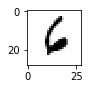

6


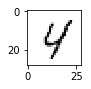

4


In [4]:
def show(image):
    fig = pyplot.figure(figsize=(1,1))
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    pyplot.show()

show(mnist.train.images[3].reshape([28,28]))
print(np.argmax(mnist.train.labels[3]))
show(mnist.test.images[555].reshape([28,28]))
print(np.argmax(mnist.test.labels[555]))

In [5]:
xtrain, xval, ytrain, yval = train_test_split(mnist.train.images, mnist.train.labels, test_size=0.1, random_state=42)
xtest = mnist.test.images
ytest = mnist.test.labels
xtrain.shape, xval.shape, xtest.shape

((49500, 784), (5500, 784), (10000, 784))

In [39]:
image_size = 28 * 28
layer1 = 300
output_size = 10

learning_rate = 0.1
iterations = 30000
dropout = 0.5
batch_size = 128

In [40]:
x = tf.placeholder(tf.float32, [None, image_size])
y = tf.placeholder(tf.float32, [None, output_size])
keep_probability = tf.placeholder(tf.float32)

In [41]:
w_relu = tf.Variable(tf.truncated_normal([image_size, layer1], stddev=0.01))
b_relu = tf.Variable(tf.truncated_normal([layer1], stddev=0.01))

w = tf.Variable(tf.zeros([layer1, output_size]))
b = tf.Variable(tf.zeros([output_size]))

In [42]:
h = tf.nn.relu(tf.matmul(x, w_relu) + b_relu) # relu layer
h_drop = tf.nn.dropout(h, keep_probability) # dropout layer
y_pred = tf.nn.softmax(tf.matmul(h_drop, w) + b) # softmax output

In [43]:
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [44]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
for i in range(iterations):
    x_batch, y_batch = mnist.train.next_batch(batch_size)
    session.run(train_step, feed_dict={x: x_batch, y: y_batch, keep_probability: dropout})
    if i%1000==0:
        print(i)
print('Done')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
Done


In [45]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1)), tf.float32))
errors = tf.reduce_sum(tf.cast(tf.not_equal(tf.argmax(y_pred, 1), tf.argmax(y, 1)), tf.float32))

In [46]:
acc = session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_probability: dropout})
errs = session.run(errors, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_probability: dropout})
print("Accuracy: %s errors: %s" % (acc, errs))

Accuracy: 0.9709 errors: 250.0
